In [8]:
#Import modules

import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
from scipy.stats import linregress
from scipy.stats import pearsonr
import seaborn as sns

print("Import successfull")

Import successfull


In [9]:
#Connection to database
conn = psycopg2.connect(database="goat", user="goat", password="earlmanigault", host="localhost", port="65432")
cur = conn.cursor()
print("Opened database successfully")

Opened database successfully


In [14]:
#Load data and pre processing
data = pd.read_sql_query("SELECT a.*, p.* from grid_access_20 a, grid_population p where a.grid_id = p.grid_id;", conn, index_col=None, coerce_float=True, params=None, parse_dates=None, chunksize=None)
print("Tables selected successfully")

Tables selected successfully


In [16]:
amenities_food = ['food_retail','supermarket','discount_supermarket','organic']
amenities_education = ['nursery','kindergarten','after_school','grundschule','hauptschule_mittelschule','realschule','gymnasium']
amenities_health = ['pharmacy','general_practitioner','paediatrician','gynaecologist','dentist']
amenities_transport = ['bus_stop','tram_stop','subway_entrance','rail_station']
origin = ['nomigr','migr','foreigner']
hh = ['hh_nochild','hh_child','hh_sp','hh_tp']

In [21]:
#correlationtable
def correl(data,amenities,population):
    for category in amenities:
        df1 = data[data[category.lower()]>0]
        print(category.lower())
        for userGroup in population:
            df2 = df1[df1[userGroup.lower()]>0]
            #pearson = df2[category.lower()].corr(df2[userGroup.lower()], method ='pearson')
            r, p = pearsonr(df2[category.lower()],df2[userGroup.lower()])
            #spearman = df1.corr(data[userGroup.lower()], method = 'spearman')
            #kendall = df1.corr(data[userGroup.lower()], method = 'kendall')
            #print(userGroup.lower()+': '+str(moran)+' '+str(spearman)+' '+str(kendall))
            #print(userGroup.lower()+' '+str(pearson)+' '+str(p))
            print(userGroup.lower()+' '+str(r)+' '+str(p))

In [48]:
correl(data,amenities_health,origin)

general_practitioner
population 0.3729890698848754 8.139598322846577e-112
nomigr 0.405785445222822 4.465119190492348e-133
migr 0.24734799955497555 1.5509737615869112e-47
foreigner 0.3023758372173149 1.8281260077205598e-71
paediatrician
population 0.2838939632658131 2.632979162926955e-52
nomigr 0.33518569874553417 4.4079925371444824e-73
migr 0.19271045445092122 2.830957855374384e-24
foreigner 0.17603312811846283 1.6503937326109468e-20
gynaecologist
population 0.17074843418156546 1.6743602565618371e-19
nomigr 0.21318879810279873 1.27137810709084e-29
migr 0.0727926155562932 0.00013887295117275553
foreigner 0.11061414274405011 6.345099013396641e-09
psychotherapist
population 0.34766672183525144 8.311761898383262e-75
nomigr 0.41640226182440265 4.851562153701216e-109
migr 0.2152291563945146 2.5196496851699048e-28
foreigner 0.22814526142812747 8.603580251232924e-32
dentist
population 0.293905378433562 5.1459488736629476e-64
nomigr 0.3456436814951844 9.402807537743046e-89
migr 0.16599649017539

In [9]:
correl(data,amenities_health,origin)

general_practitioner
population: 0.37310270221064773 0.5019798089281685 0.3552445361992244
nomigr: 0.40612249034172093 0.49295564593154856 0.34972155991796233
migr: 0.24804090618371544 0.4610623417173217 0.3248470932975734
foreigner: 0.3048484655224844 0.4828971515671937 0.33870467407471055
paediatrician
population: 0.28414235306693464 0.29550863061811916 0.20034460035687005
nomigr: 0.33571739825010477 0.3235978458718527 0.21999459618430203
migr: 0.19428528438457587 0.24979399866595228 0.16902863333092732
foreigner: 0.17774539827021488 0.24627560051376118 0.16646333311432568
gynaecologist
population: 0.17086911807832775 0.29319527467984163 0.20051279379932327
nomigr: 0.21342290919150922 0.32078349670848655 0.22057682200866413
migr: 0.07089022363444769 0.23439926868821748 0.1595332928118723
foreigner: 0.11164678556565372 0.25336290262896954 0.1724582248706639
psychotherapist
population: 0.3476667218352514 0.351976494442411 0.24261839728489634
nomigr: 0.41650194329572504 0.36614357039527

In [11]:
def plot(data,amenities,population):
    for category in amenities:
        df1 = data[data[category.lower()]>0]
        for userGroup in population:
            df2 = df1[df1[userGroup.lower()]>0]
            x = df2[category.lower()]
            y = df2[userGroup.lower()]
            plt.scatter(x, y)
            plt.plot(np.unique(x),
                    np.poly1d(np.polyfit(x,y,1))
                    (np.unique(x)))
        plt.legend(population)    
        plt.xlabel('accessibility index')
        plt.ylabel('population')
        plt.title(category.lower())
        plt.show()


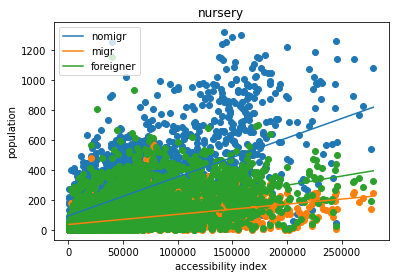

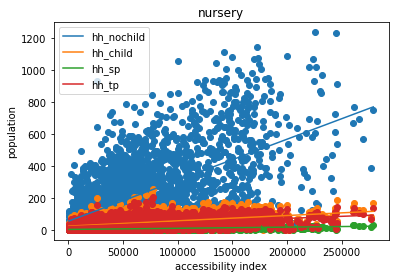

In [19]:
plot(data,['nursery'],origin)
plot(data,['nursery'],hh)

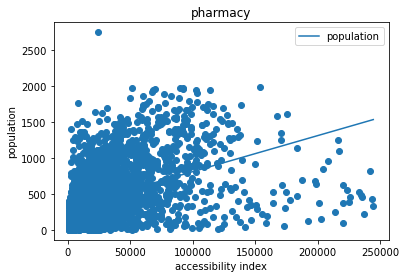

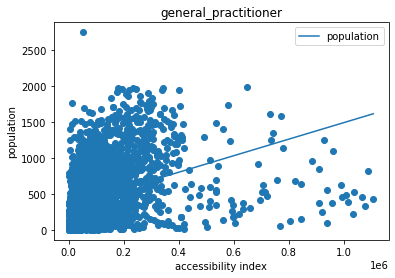

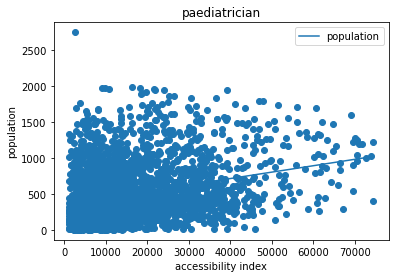

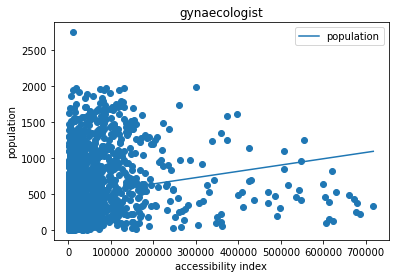

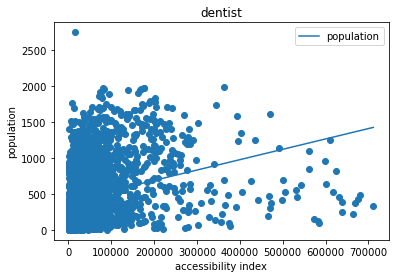

In [12]:
plot(data,amenities_health,['population'])

In [ ]:
# adds the title

plt.title('Correlation'+' ')
df1 = data[data['supermarket']>0]
df2 = df1[df1['migr']>0]
x = df2['supermarket']
y = df2['migr']
# plot the data
plt.scatter(x, y)
  
# fits the best fitting line to the data
plt.plot(np.unique(x), 
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
  
# Labelling axes
plt.xlabel('x axis')
plt.ylabel('y axis')

In [44]:
#Standard deviation population
n_nonzero = np.count_nonzero(df['population'])
mean = np.sum(df['population'])/n_nonzero
quad = sum(pow((df['population']-mean),2))
variance = (1/n_nonzero)*quad
deviation = np.sqrt(variance)

deviation

370.7083456668992

In [24]:
#Standard deviation accessibility
n_nonzero = np.count_nonzero(df['ai'])
mean = np.sum(df['ai'])/n_nonzero
quad = sum(pow((df['ai']-mean),2))
variance = (1/n_nonzero)*quad
deviation = np.sqrt(variance)
deviation

16125.524012499742

In [39]:
#Covariance
n_nonzerox=np.count_nonzero(df['population'])
n_nonzeroy=np.count_nonzero(df['ai'])
meanx= np.sum(df['population'])/n_nonzerox
meany=np.sum(df['ai'])/n_nonzeroy
cxy = 0
df1 = list(df['population'])
df2 = list(df['ai'])

for i in range(len(df)):
    cxy = cxy + (df1[i]*df2[i]-meanx*meany)

cxy = (1/n_nonzerox)*cxy
cxy

2715022.2854061336

In [43]:
#Pearson r
r = 2715022.285/(370.71*16125.52)
r

0.45417724230688983

In [45]:
b = cxy/deviation
b

7323.876889045608

In [47]:
a = meany - b*meanx
a

-3040041.788587006

C:\Users\sebas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Acessibiltiy Index'), Text(0, 0.5, 'Frequency')]

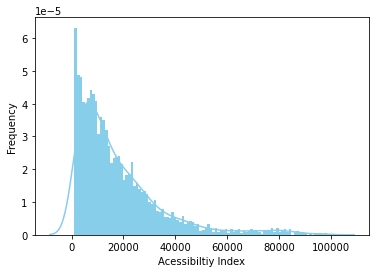

In [86]:
ax = sns.distplot(data['supermarket'],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Acessibiltiy Index', ylabel='Frequency')

C:\Users\sebas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Acessibiltiy Index'), Text(0, 0.5, 'Frequency')]

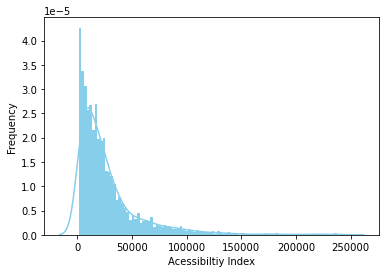

In [87]:
ax = sns.distplot(data['pharmacy'],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Acessibiltiy Index', ylabel='Frequency')

[Text(0.5, 0, 'pharmacy'),
 Text(1.5, 0, 'general_practitioner'),
 Text(2.5, 0, 'paediatrician'),
 Text(3.5, 0, 'gynaecologist'),
 Text(4.5, 0, 'dentist')]

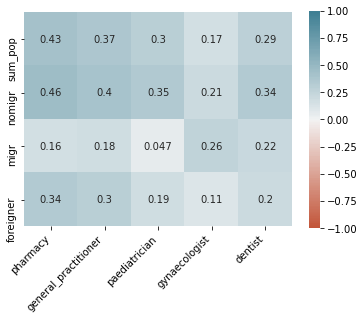

In [12]:
# health, origin
df = data.corr(method = 'pearson')
df[amenities_health][24:28]
ax = sns.heatmap(
    df[amenities_health][24:28], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

[Text(0.5, 0, 'pharmacy'),
 Text(1.5, 0, 'general_practitioner'),
 Text(2.5, 0, 'paediatrician'),
 Text(3.5, 0, 'gynaecologist'),
 Text(4.5, 0, 'dentist')]

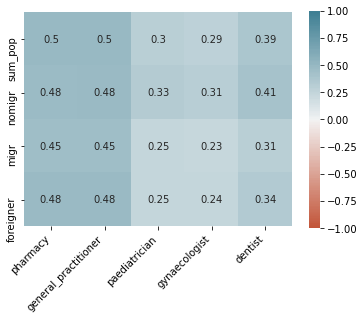

In [13]:
# health, origin
df = data.corr(method = 'spearman')
df[amenities_health][24:28]
ax = sns.heatmap(
    df[amenities_health][24:28], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

[Text(0.5, 0, 'pharmacy'),
 Text(1.5, 0, 'general_practitioner'),
 Text(2.5, 0, 'paediatrician'),
 Text(3.5, 0, 'gynaecologist'),
 Text(4.5, 0, 'dentist')]

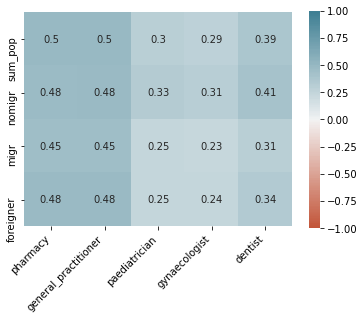

In [14]:
# health, origin
df = data.corr(method = 'spearman')
df[amenities_health][24:28]
ax = sns.heatmap(
    df[amenities_health][24:28], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [16]:
df[amenities_education][24:28]

,kindergarten,nursery,after_school,grundschule,hauptschule_mittelschule,realschule,gymnasium
sum_pop,0.573690,0.560068,0.517571,0.483770,0.301576,0.229592,0.120172
nomigr,0.587176,0.572633,0.502247,0.463393,0.285430,0.169819,0.164538
migr,0.043428,0.039312,0.061908,0.066713,-0.023874,-0.029247,0.095725
foreigner,0.472635,0.470704,0.454301,0.428195,0.281709,0.262342,0.050136


[Text(0.5, 0, 'nursery'),
 Text(1.5, 0, 'kindergarten'),
 Text(2.5, 0, 'after_school'),
 Text(3.5, 0, 'grundschule'),
 Text(4.5, 0, 'hauptschule_mittelschule'),
 Text(5.5, 0, 'realschule'),
 Text(6.5, 0, 'gymnasium')]

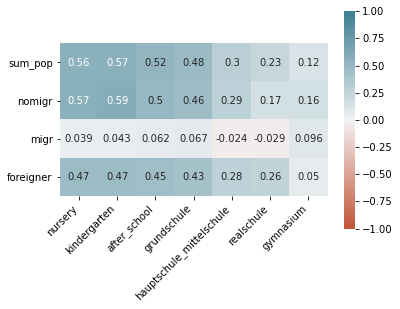

In [6]:
#education, origin
df = data.corr()
df[amenities_education][24:28]
ax = sns.heatmap(
    df[amenities_education][24:28], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

[Text(0.5, 0, 'food_retail'),
 Text(1.5, 0, 'supermarket'),
 Text(2.5, 0, 'discount_supermarket'),
 Text(3.5, 0, 'organic')]

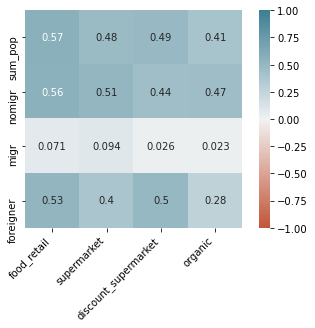

In [18]:
#food, origin
df = data.corr()
df[amenities_food][24:28]
ax = sns.heatmap(
    df[amenities_food][24:28], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

[Text(0.5, 0, 'food_retail'),
 Text(1.5, 0, 'supermarket'),
 Text(2.5, 0, 'discount_supermarket'),
 Text(3.5, 0, 'organic')]

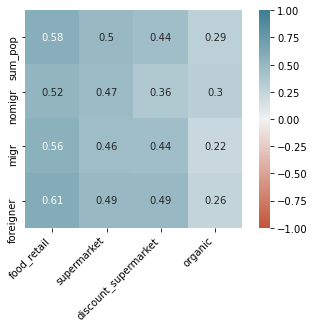

In [19]:
#food, origin
df = data.corr(method='spearman')
df[amenities_food][24:28]
ax = sns.heatmap(
    df[amenities_food][24:28], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

[Text(0.5, 0, 'bus_stop'),
 Text(1.5, 0, 'tram_stop'),
 Text(2.5, 0, 'subway_entrance'),
 Text(3.5, 0, 'rail_station')]

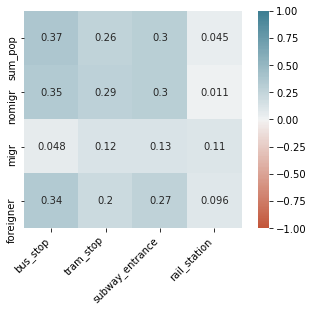

In [21]:
#transport, origin
df = data.corr()
df[amenities_transport][24:28]
ax = sns.heatmap(
    df[amenities_transport][24:28], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

[Text(0.5, 0, 'kindergarten'),
 Text(1.5, 0, 'nursery'),
 Text(2.5, 0, 'after_school'),
 Text(3.5, 0, 'grundschule'),
 Text(4.5, 0, 'hauptschule_mittelschule'),
 Text(5.5, 0, 'realschule'),
 Text(6.5, 0, 'gymnasium')]

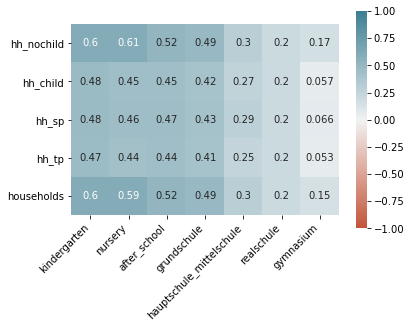

In [22]:
# education, households
df = data.corr()
ax = sns.heatmap(
    df[amenities_education][34:39], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

[Text(0.5, 0, 'general_practitioner'),
 Text(1.5, 0, 'paediatrician'),
 Text(2.5, 0, 'gynaecologist'),
 Text(3.5, 0, 'psychotherapist'),
 Text(4.5, 0, 'dentist'),
 Text(5.5, 0, 'pharmacy')]

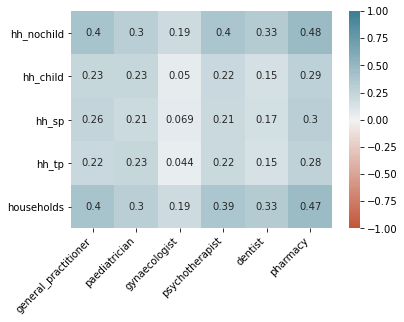

In [46]:
# health, households
df = data.corr()
ax = sns.heatmap(
    df[amenities_health][34:39], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

[Text(0.5, 0, 'supermarket'),
 Text(1.5, 0, 'discount_supermarket'),
 Text(2.5, 0, 'hypermarket'),
 Text(3.5, 0, 'organic')]

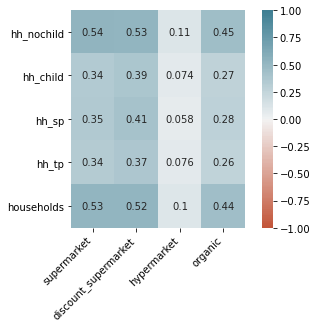

In [48]:
# food, households
df = data.corr()
ax = sns.heatmap(
    df[amenities_food][34:39], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

[Text(0.5, 0, 'bus_stop'),
 Text(1.5, 0, 'tram_stop'),
 Text(2.5, 0, 'subway_entrance'),
 Text(3.5, 0, 'rail_station')]

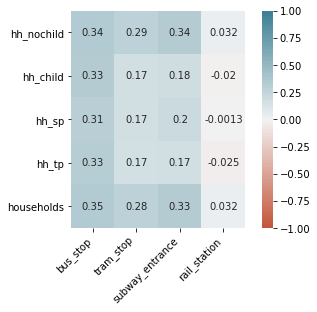

In [49]:
# transport, households
df = data.corr()
ax = sns.heatmap(
    df[amenities_transport][34:39], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)